### Pair VIII
# ENCODING

In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para la codificación de las variables 
# -----------------------------------------------------------------------
from sklearn.preprocessing import OrdinalEncoder 

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librerías para la visualización de los datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Para visualizar todas las columnas
# -----------------------------------------------------------------------
pd.options.display.max_columns = None

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.
Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.
  
- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
  
- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming


In [4]:
df = pd.read_pickle("../data/cost_of_living_pair1_limpio.pkl")
df.sample(5)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
4669,Woodinville,United States,América del Norte,2775.69,4.521571,4.7355,4.166,33.833333,68.8605,29.809,11.00,9.416,1700.000,19.6896,1.504,23500.000,70.00,0.110,196.958,1497.7075,5074.064,4.62
1313,Sincelejo,Colombia,América del Sur,203.80,1.060714,0.9950,0.750,7.813333,37.8950,12.230,3.06,1.630,61.140,2.5680,0.440,14775.530,17.97,0.040,36.680,267.5890,708.720,11.58
1791,Fort Lauderdale,United States,América del Norte,4948.00,5.180714,5.0625,4.450,36.333333,62.6225,30.040,13.00,7.000,850.000,18.4160,1.230,22730.835,68.00,0.280,133.620,2719.0500,4036.470,4.87
2480,Eastbourne,United Kingdom,Europa,2042.00,3.570000,3.5425,2.600,40.443333,83.3300,29.830,14.71,14.410,900.880,21.0380,1.830,27476.920,36.04,0.162,192.460,1141.1200,951.930,4.00
1972,Lake Charles,United States,América del Norte,3149.00,5.300714,4.4850,3.454,34.583333,54.0000,34.970,8.50,6.500,755.558,17.9364,1.150,19679.375,68.75,0.120,164.750,1644.1475,3184.467,4.69


- Hacemos un boxplot para relacionar la vp 'continente' con la vr 'salario' y poder comparar las medianas.

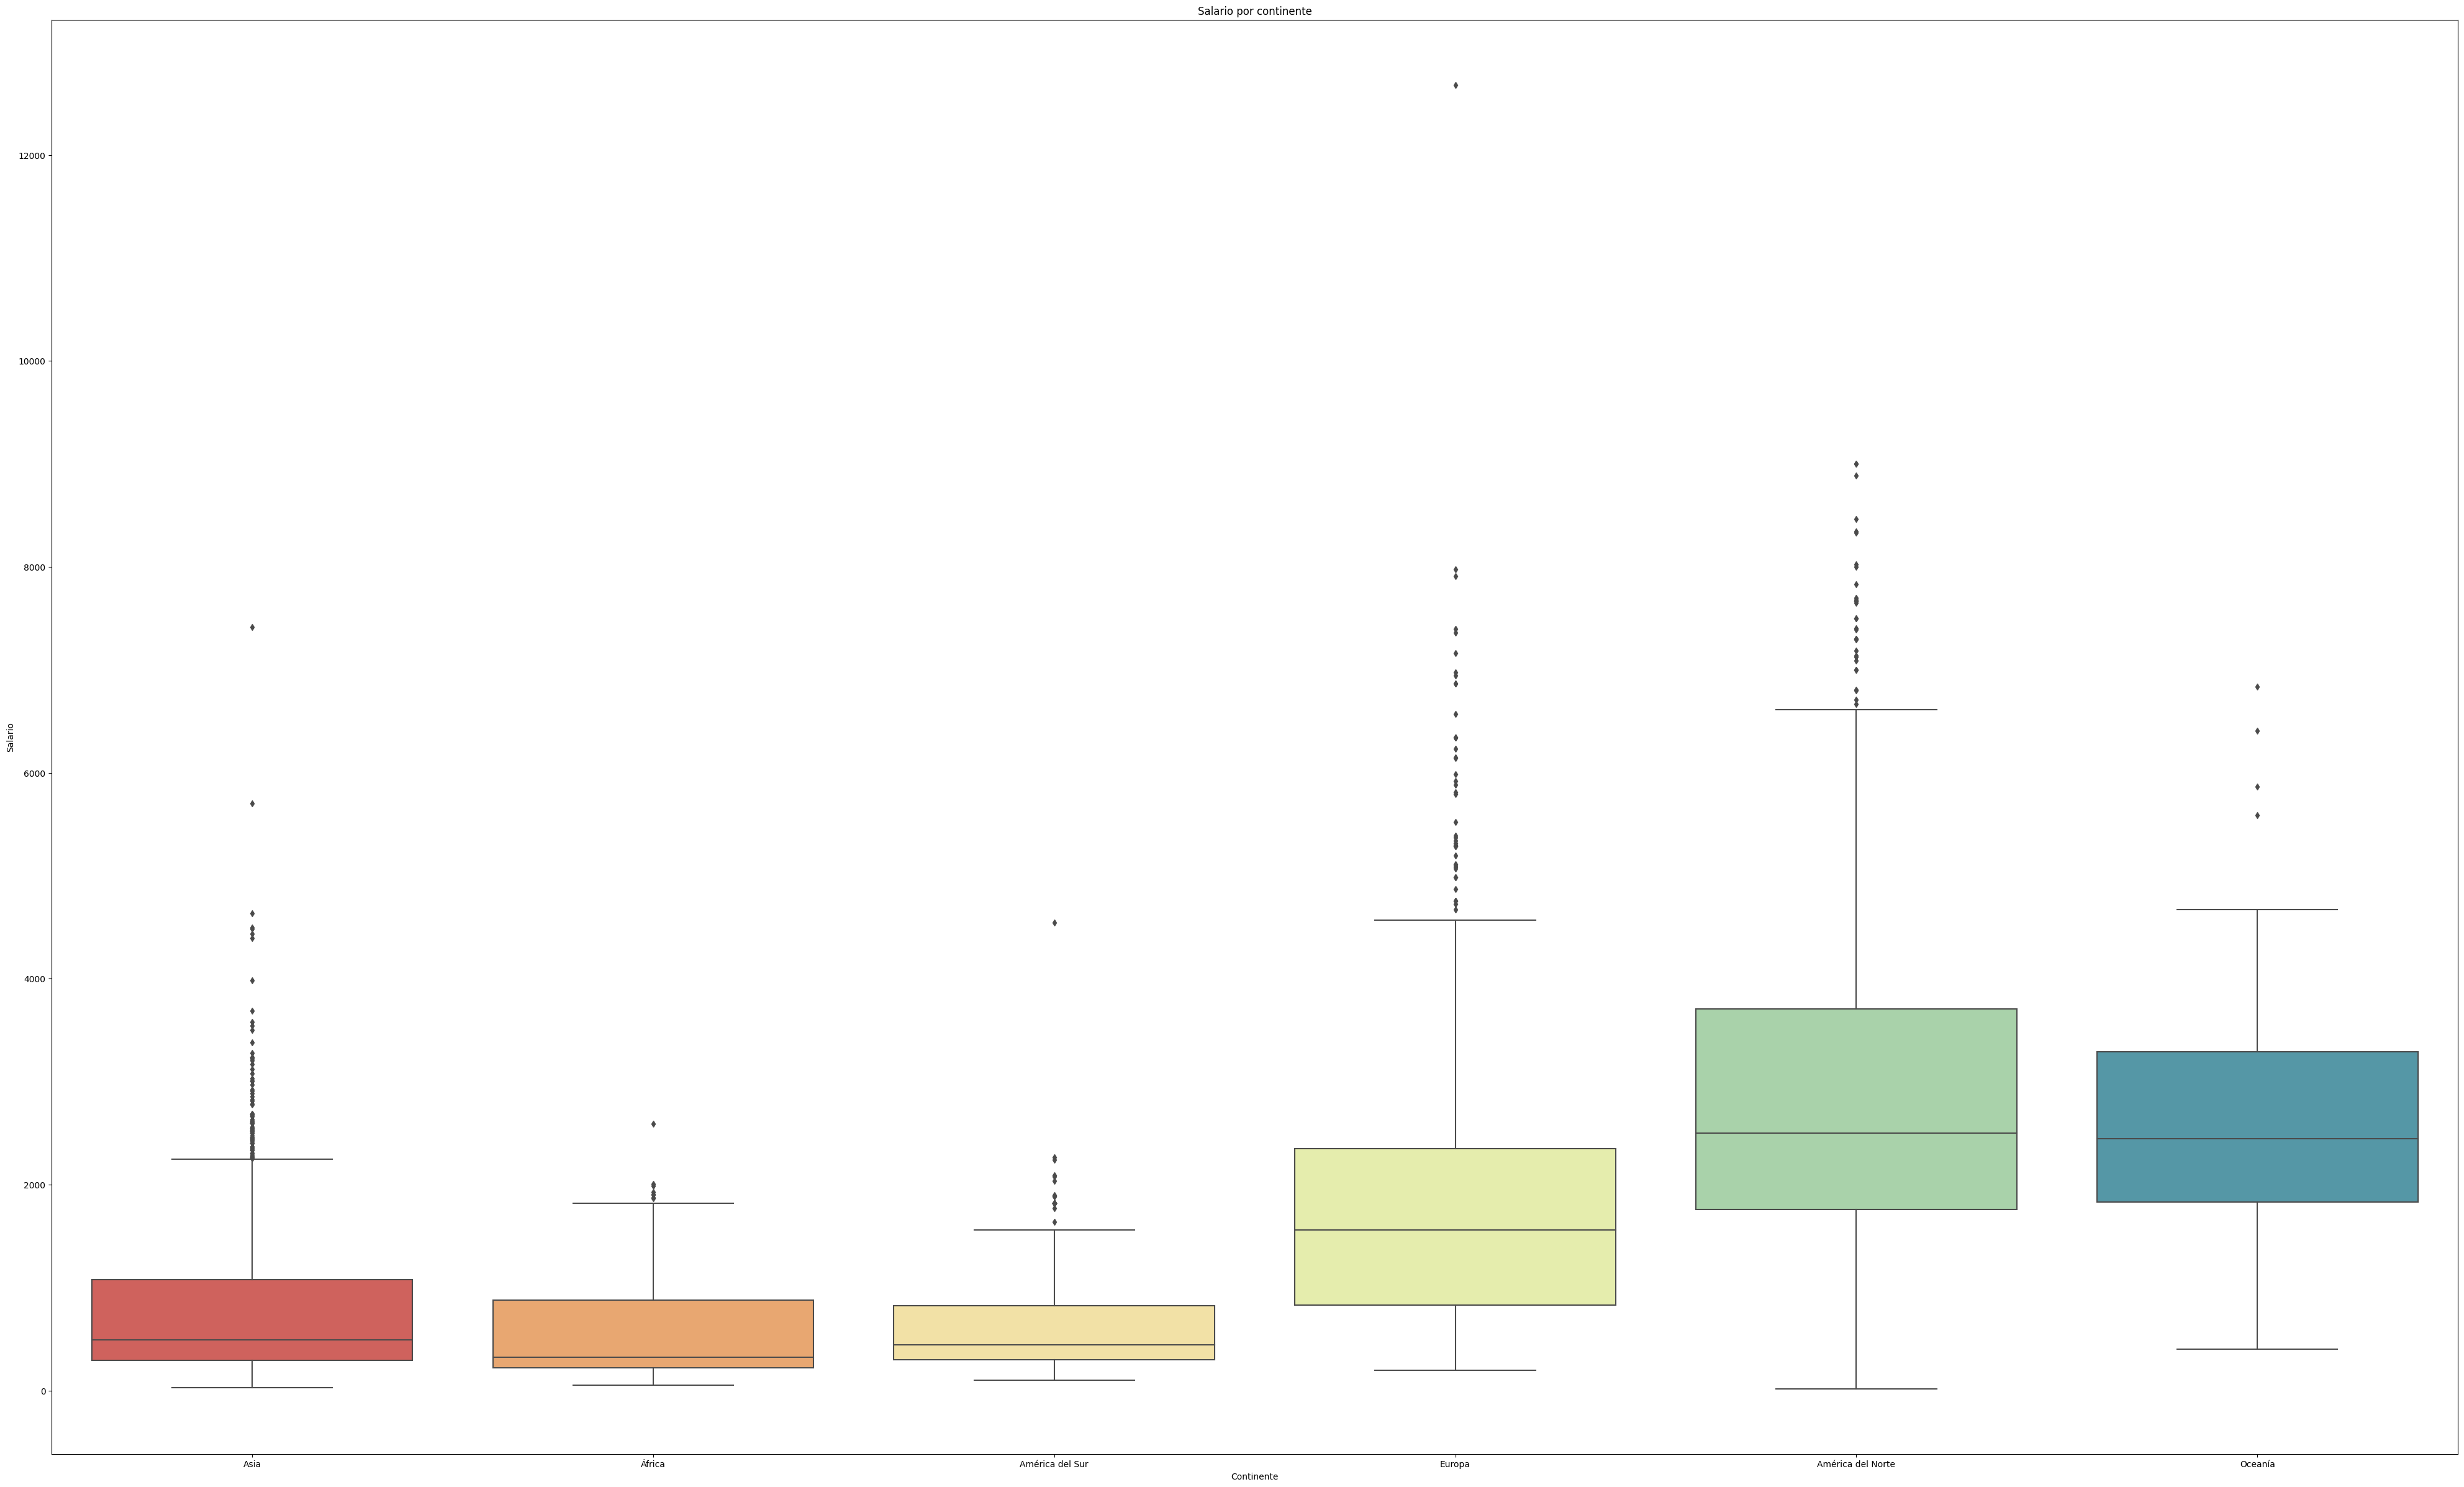

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 30))

sns.boxplot(
    x       = 'continente',
    y       = 'salario',
    data    = df,
    palette = qualitative_colors,
    ax      = ax
)
ax.set_title('Salario por continente')
ax.set_ylabel('Salario')
ax.set_xlabel('Continente')
plt.savefig("../graficas/08_encoding_boxplot_continentes.png");

- Recodificamos la variable 'continente' ya que:

  - La usaremos como variable predictiva

  - La incorporaremos más adelante al modelo predictivo

- 'continente' es una variable que SI tiene orden, ya que se aprecian diferencias entre las medianas, afecta a la vr. 

```Ordinal Encoder```

- Según vimos en "visualización", todas nuestras variables predictorias categóricas tienen orden, por lo que usaremos el método Ordinal Encoder, ya que map no funciona bien cuando hay outliers y Label Encoder asigna orden aleatoriamente.

In [12]:
df.continente.unique()

array(['Asia', 'África', 'América del Sur', 'Europa', 'América del Norte',
       'Oceanía'], dtype=object)

Establecemos el orden que queremos en función del salario.


In [20]:
orden = ["América del Sur",
              "África",
              "Asia", 
              "Europa", 
              "Oceanía", 
              "América del Norte"]
       

In [21]:

def ordinal_encoder1(df, columna, orden_valores):

    '''Esta función recibe tres parámetros y aplica el orden ponderado de menor a mayor a los países con una 
    lista que le pasamos '''
    
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    oe_df = pd.DataFrame(transformados_oe)
    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    df[columna] = oe_df
     
    return df

In [22]:
df = ordinal_encoder1(df, "continente", orden)

In [23]:
df.sample(5)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
4438,Acton,United States,América del Norte,4500.000,4.633143,4.2900,5.684,27.560000,77.1675,33.577,11.00,11.00,1044.626,17.0352,1.296,26906.008,113.374,0.226,272.816,2075.000,3013.895,4.00,5
1040,Miyazaki,Japan,Asia,1733.522,4.387143,3.0225,1.788,13.666667,46.4725,27.256,11.91,4.04,476.460,13.9116,1.190,19972.810,19.850,0.280,192.320,312.252,2905.972,1.50,2
4556,Fushe-Kruje,Albania,Europa,1422.104,1.805714,1.5325,1.140,12.186667,52.5275,20.133,6.17,2.95,66.070,3.7844,1.660,19410.175,13.210,0.090,77.660,294.142,2269.263,4.44,3
3432,Munxar,Malta,Europa,727.090,3.856429,2.9225,1.924,30.123333,58.1650,28.953,10.91,6.23,313.770,11.6340,1.330,25707.740,37.580,0.310,82.770,1168.535,2307.857,4.50,3
3243,Orange Walk,Belize,América del Norte,675.072,2.272143,4.4125,1.754,10.263333,62.5050,26.469,7.48,3.23,198.910,7.0100,1.470,26165.370,62.200,0.210,53.740,329.725,1949.420,8.00,5


In [24]:
df.duplicated().sum()

0

In [25]:
# Las columnas 'pais' y 'ciudad' no las hemos re-categorizado porque no las tendremos en 
# cuenta para la predicción.

df.drop(['ciudad', 'pais', 'continente'], axis = 1, inplace = True)

In [26]:
df.duplicated().sum()

87

In [27]:
df.drop_duplicates(inplace=True,  ignore_index=True)

In [28]:
df.head()

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
0,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.770,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,2
1,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.950,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,2
2,483.19,2.548571,6.5800,1.650,9.430000,54.5075,21.285,3.18,2.22,132.74,2.662,0.79,26734.235,30.45,0.11,80.12,613.7650,1981.745,9.15,2
3,419.02,2.475000,3.0475,1.498,11.493333,49.1750,26.970,5.48,2.65,254.89,3.092,1.38,20592.315,38.02,0.15,97.45,820.1275,3066.240,7.80,2
4,2672.23,7.647857,5.1825,2.728,21.986667,70.2475,36.415,9.42,3.39,384.01,11.052,1.41,27749.865,22.06,0.16,176.24,1424.5550,16340.420,3.47,2


In [29]:
df.index

RangeIndex(start=0, stop=4787, step=1)

In [30]:
df.duplicated().sum()

0

In [31]:
df.to_pickle("../data/8_encoding.pkl")